In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [64]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1+self.e)
        self.v[1] = np.sqrt( self.G*(1-self.e)/(self.a_*(1.+self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r

        print("Dimensiones de self.r:", self.R.shape)
        
    def GetAceleration(self):

        d = np.linalg.norm(self.r)
        alpha = 1.1e-8
        self.a = ((-self.G/d**3)*(1+(alpha/d**3)))*self.r

        return self.a
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt + 0.5*self.a*self.dt**2
        else:
            
            # rp pasado, r presente rf futuro ***revisar verlet self.v***
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = self.v + 0.5 * (self.a + self.GetAceleration()) * self.dt
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        angle = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
                angle.append(np.abs(np.arctan2(self.R[i][1], self.R[i][0])*180/np.pi))
                

            
        return timeup, angle

In [65]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.205630,0.387098,t)
    
    return [Mercurio]

In [66]:
def RunSimulation(t,Planetas):
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
    return Planetas

In [67]:
dt = 0.001
tmax = 3
t = np.arange(0., tmax, dt)
Planetas = GetPlanetas(t)
Planetas = RunSimulation(t, Planetas)

Dimensiones de self.r: (3000, 3)


Running simulation: 100%|██████████| 3000/3000 [00:00<00:00, 47469.79 Steps/s]


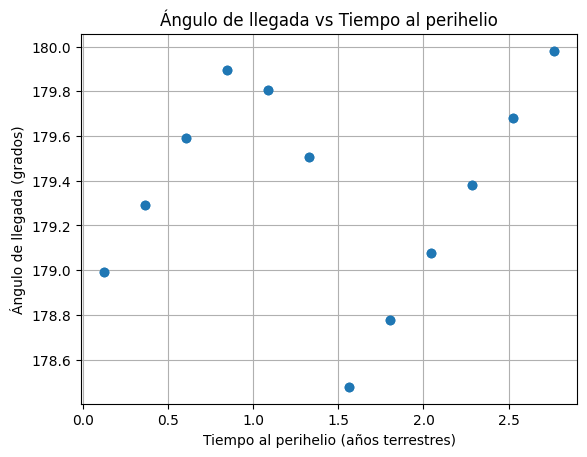

([0.12,
  0.361,
  0.602,
  0.843,
  1.084,
  1.325,
  1.565,
  1.806,
  2.047,
  2.2880000000000003,
  2.529,
  2.77],
 [178.99175651810148,
  179.2922565046437,
  179.59276509514245,
  179.89327699287128,
  179.80621309936797,
  179.5057104784658,
  178.47780341729558,
  178.77830044194312,
  179.07880738761727,
  179.3793189577216,
  179.6798298552035,
  179.98033478300854])

In [68]:
# Obtener tiempo y ángulo de llegada al perihelio de Mercurio
perihelio_time, angle = Planetas[0].GetPerihelio()

plt.plot(perihelio_time*2, angle*2, 'o')
plt.xlabel('Tiempo al perihelio (años terrestres)')
plt.ylabel('Ángulo de llegada (grados)')
plt.title('Ángulo de llegada vs Tiempo al perihelio')
plt.grid(True)
plt.show()
perihelio_time, angle